In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



import warnings
warnings.filterwarnings('ignore')

# Wine Dataset
file_path = 'wine.csv'
df = pd.read_csv(file_path)

# Adjust pd settings
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


<h1 style='text-align: center; color:#003049'>Exploring Wine Characteristics through PCA and K-Means Clustering</h1>
<hr>
<p>The goal of this project is to leverage Principal Component Analysis (PCA) and K-Means Clustering to analyze and classify wine datasets. By reducing dimensionality and identifying clusters within the data, we aim to uncover meaningful patterns and relationships in wine metrics, enhancing our understanding of wine characteristics and their classifications.</p><br>

<h5>DataSet Information:</h5>
<table border="1">
  <thead>
    <tr>
      <th>Feature</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Alcohol</td>
      <td>Percentage of ethanol affecting taste and body.</td>
    </tr>
    <tr>
      <td>Malic Acid</td>
      <td>Organic acid contributing to tartness and acidity.</td>
    </tr>
    <tr>
      <td>Ash</td>
      <td>Residue after combustion, representing inorganic minerals.</td>
    </tr>
    <tr>
      <td>Alcalinity of Ash</td>
      <td>Ability of ash to neutralize acids, affecting stability.</td>
    </tr>
    <tr>
      <td>Magnesium</td>
      <td>Mineral influencing flavor and stability.</td>
    </tr>
    <tr>
      <td>Total Phenols</td>
      <td>Compounds affecting color, flavor, and mouthfeel.</td>
    </tr>
    <tr>
      <td>Flavanoids</td>
      <td>Phenolic compounds influencing color, flavor, and astringency.</td>
    </tr>
    <tr>
      <td>Nonflavanoid Phenols</td>
      <td>Phenols affecting taste, color, and aging.</td>
    </tr>
    <tr>
      <td>Proanthocyanins</td>
      <td>Flavonoids affecting color and astringency.</td>
    </tr>
    <tr>
      <td>Color Intensity</td>
      <td>Depth of color indicating phenolic content.</td>
    </tr>
    <tr>
      <td>Hue</td>
      <td>Color describing the wine's age and type.</td>
    </tr>
    <tr>
      <td>OD280</td>
      <td>Ratio assessing phenolic concentration and color.</td>
    </tr>
    <tr>
      <td>Proline</td>
      <td>Amino acid used as a marker for wine quality.</td>
    </tr>
  </tbody>
</table>



In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 13)

In [5]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<h1 style="color: #F3A84A;">CLUSTERING</h1>


<h3>PCA and Standardazing</h3>

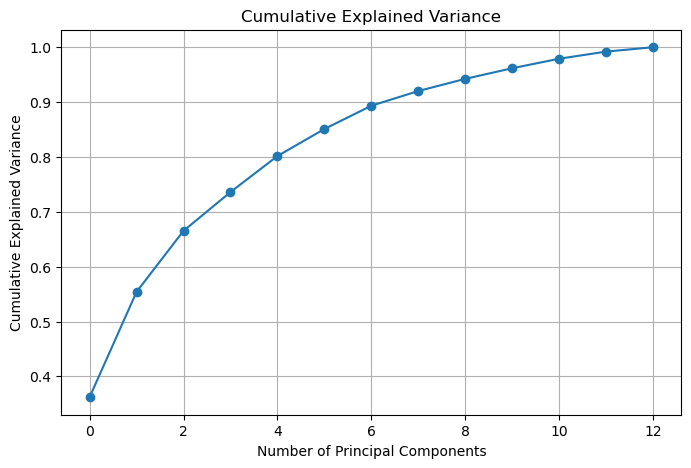

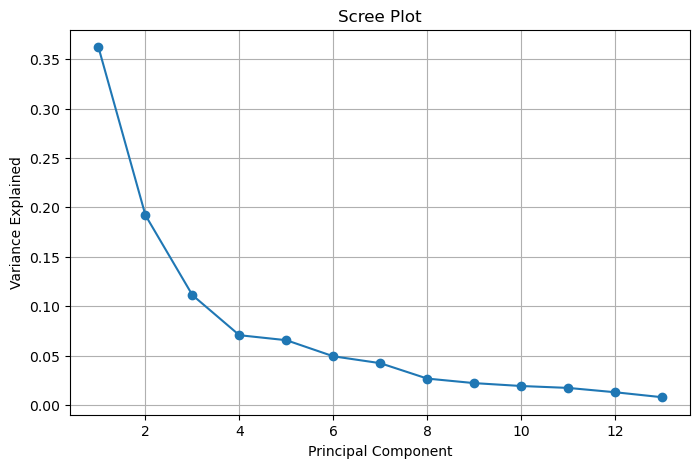

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca = PCA()
pca.fit(X_scaled)


explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Cumulative Explained Varience
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance_ratio, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

<p> Chosed 4 principal components because they capture over 80% of the total variance. The cumulative explained variance surpasses 0.8. The scree plot also shows an elbow at the 4th component, indicating a sharp drop in explained variance after this point.</p>

In [38]:
component_count = 4
pca = PCA(n_components=component_count)
pca.fit(df)
transformed= pca.transform(df)
print(transformed[:5])

[[ 3.18563599e+02  2.14917518e+01  3.13392653e+00 -2.42167977e-01]
 [ 3.03098052e+02 -5.36510173e+00  6.82531044e+00 -8.59461635e-01]
 [ 4.38061657e+02 -6.53747343e+00 -1.11144012e+00  9.16771313e-01]
 [ 7.33240426e+02  1.93031841e-01 -9.19894313e-01 -5.47168791e-01]
 [-1.15718111e+01  1.84903482e+01 -5.56753889e-01  1.35268627e+00]]


<h3>Clustering with KMeans</h3>

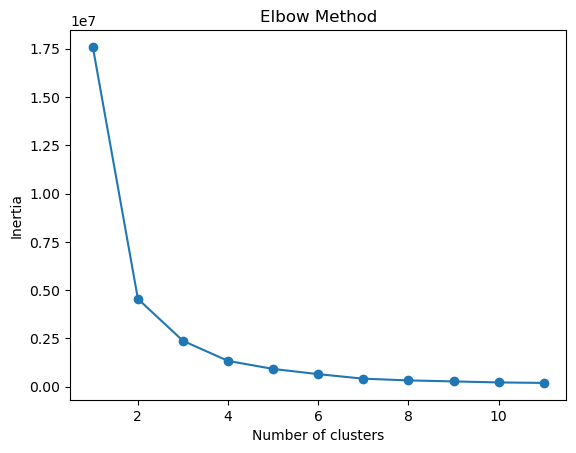

In [16]:
inertia = []

for k in range(1,12):
    kmeans= KMeans(n_clusters=k, random_state=41).fit(transformed)
    inertia.append(kmeans.inertia_)

#Plot
plt.plot(range(1, 12), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

<h3>Sillhoute Score</h3>

Number of clusters: 2, Silhouette Score: 0.6569
Number of clusters: 3, Silhouette Score: 0.5713
Number of clusters: 4, Silhouette Score: 0.5614
Number of clusters: 5, Silhouette Score: 0.5493
Number of clusters: 6, Silhouette Score: 0.5660
Number of clusters: 7, Silhouette Score: 0.5621
Number of clusters: 8, Silhouette Score: 0.5414
Number of clusters: 9, Silhouette Score: 0.5316
Number of clusters: 10, Silhouette Score: 0.5222
Number of clusters: 11, Silhouette Score: 0.5188


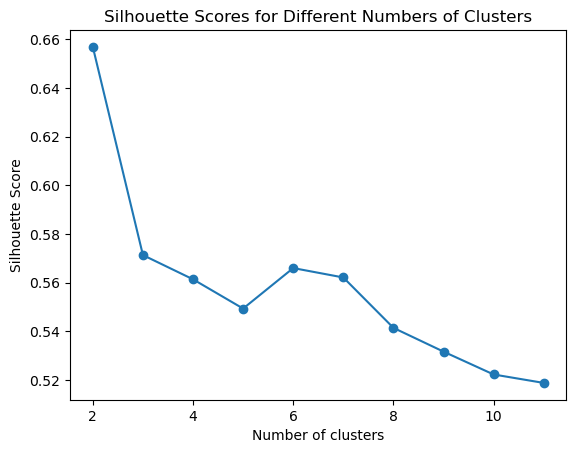

In [18]:
silhouette_scores = []

for k in range(2, 12): 
    kmeans = KMeans(n_clusters=k, random_state=41).fit(transformed)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(transformed, labels)
    silhouette_scores.append(silhouette_avg)
    print(f'Number of clusters: {k}, Silhouette Score: {silhouette_avg:.4f}')

# Plot
plt.plot(range(2, 12), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

<h3>Labeling the Wines</h3>

<p>The score for 2 clusters (0.6569) is the highest among all tested cluster numbers, suggesting that 2 clusters are the most distinct and well-separated.

</p>

In [20]:
optimal_cluster_value=2
kmeans = KMeans(n_clusters=optimal_cluster_value, random_state=41)
kmeans.fit(transformed)

cluster_labels = kmeans.predict(transformed)

df['Cluster'] = cluster_labels

df.sample(8)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
118,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372,0
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1
119,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564,0
100,12.08,2.08,1.70,17.5,97,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710,0
143,13.62,4.95,2.35,20.0,92,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550,0
116,11.82,1.47,1.99,20.8,86,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495,0
98,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660,0
39,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760,0


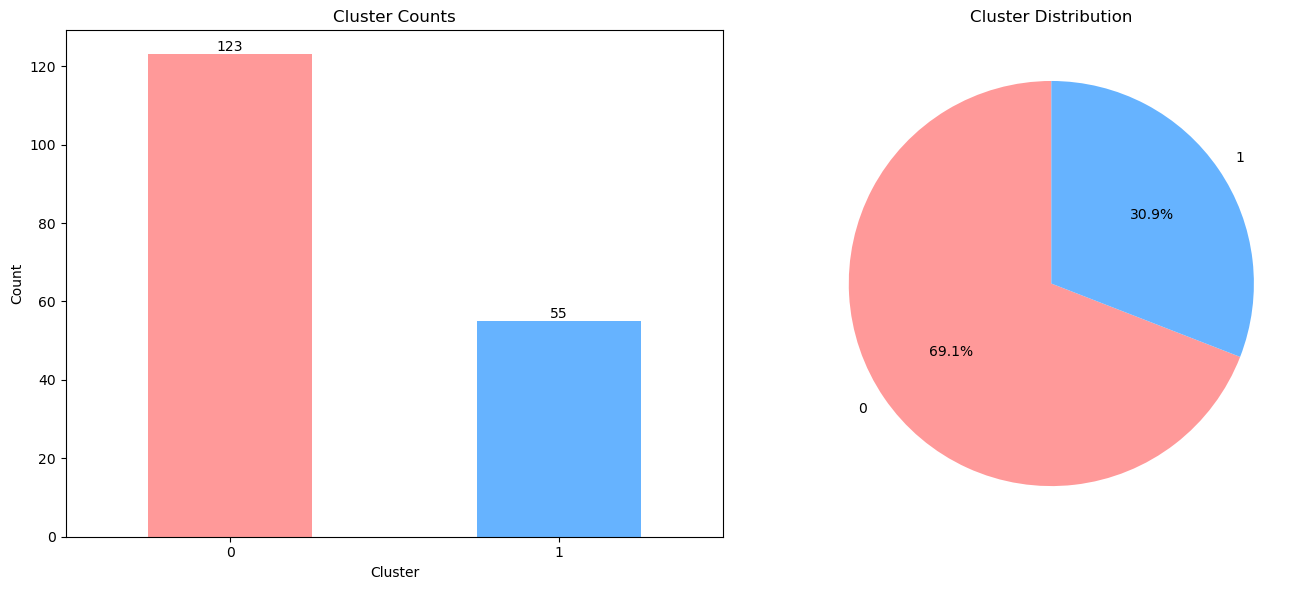

In [21]:
cluster_counts = df["Cluster"].value_counts()
palette=['#ff9999','#66b3ff']
plt.figure(figsize=(14, 6))

# Bar Chart
plt.subplot(1, 2, 1)
barplot = cluster_counts.plot.bar(color=palette)
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Pie Chart
plt.subplot(1, 2, 2)
cluster_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=palette)
plt.title('Cluster Distribution')
plt.ylabel('') 

for container in barplot.containers:
    barplot.bar_label(container, fontsize=10)

plt.tight_layout()
plt.show()

<h1>Understanding the Analysis</h1>

<ol>
    <li>
        <strong>Standardize the Data:</strong>
        <br>
        Used <code>StandardScaler</code> to adjust the data so that each feature has a mean of 0 and a standard deviation of 1.
    </li>
    <br>
    <li>
        <strong>Apply Principal Component Analysis (PCA):</strong>
        <br>
        Performed PCA on the standardized data to reduce dimensionality while retaining the most variance. Reduced the component number from 12 to 4.
    </li>
    <br>
    <li>
        <strong>Cumulative Explained Variance:</strong>
        <br>
        Created a plot to show how much variance is explained by adding more principal components. This helps decide how many components to keep.
    </li>
    <br>
    <li>
        <strong>Scree Plot:</strong>
        <br>
        Generated a scree plot to visualize the variance explained by each principal component. Looked for the "elbow" to choose the number of components.
    </li>
    <br>
    <li>
        <strong>Reduce Data to Selected Components:</strong>
        <br>
         Chosed 4 principal components in this example. Transformed the data using these components to simplify it while keeping key features.
    </li>
    <br>
    <li>
        <strong>Find Optimal Number of Clusters Using the Elbow Method:</strong>
        <br>
        Plotted the inertia for different cluster counts to find the "elbow." This indicates the best number of clusters where adding more clusters yields minimal gains.
    </li>
    <br>
    <li>
        <strong>Evaluate Clustering with Silhouette Scores:</strong>
        <br>
        Calculated silhouette scores for different cluster counts. Higher scores indicate better-defined clusters. Used these scores to choose the optimal number of clusters. Which is 2 in this analysis.
    </li>
</ol>


<h1 style='color: red; text-align: center;'>Conclusion</h1>
<p>The PCA and K-Means Clustering analysis identified two clusters in the wine dataset:</p>
<ul>
  <li><strong>Cluster 0</strong>: 123 samples (69.1%)—the majority cluster with predominant features.</li>
  <li><strong>Cluster 1</strong>: 55 samples (30.9%)—the minority cluster with less common attributes.</li>
</ul>
<p>These findings highlight the effectiveness of the methods in uncovering meaningful patterns in wine characteristics.</p>
